In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 50kB/s 
     |████████████████████████████████| 4.3MB 35.0MB/s 
     |████████████████████████████████| 501kB 54.4MB/s 


In [0]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as ts 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D, MaxPool2D, Dropout

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
X_train = X_train/255
X_test = X_test/255

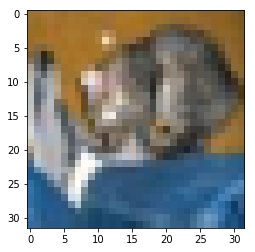

In [0]:
plt.imshow(X_test[0])

In [0]:
y_test


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Build CNN MODEL

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu' ))
model.add(MaxPool2D( pool_size=(2,2), strides=2, padding='valid'))
model.add( Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 226s 5ms/sample - loss: 1.7063 - sparse_categorical_accuracy: 0.3491 - val_loss: 1.3620 - val_sparse_categorical_accuracy: 0.4896
Epoch 2/10
50000/50000 [==============================] - 226s 5ms/sample - loss: 1.2961 - sparse_categorical_accuracy: 0.5295 - val_loss: 1.2222 - val_sparse_categorical_accuracy: 0.5625
Epoch 3/10
50000/50000 [==============================] - 227s 5ms/sample - loss: 1.1347 - sparse_categorical_accuracy: 0.5972 - val_loss: 1.1007 - val_sparse_categorical_accuracy: 0.6147
Epoch 4/10
50000/50000 [==============================] - 225s 5ms/sample - loss: 1.0260 - sparse_categorical_accuracy: 0.6431 - val_loss: 1.0303 - val_sparse_categorical_accuracy: 0.6379
Epoch 5/10
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.9480 - sparse_categorical_accuracy: 0.6690 - val_loss: 0.9868 - val_sparse_categorical_accuracy: 0.6618
Epoch 6/10

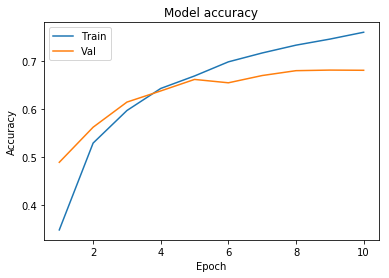

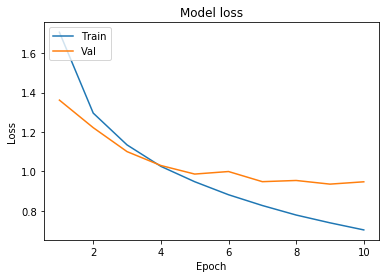

In [0]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred=model.predict_classes(X_test)

In [0]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test,y_pred)

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8652b80f0>)

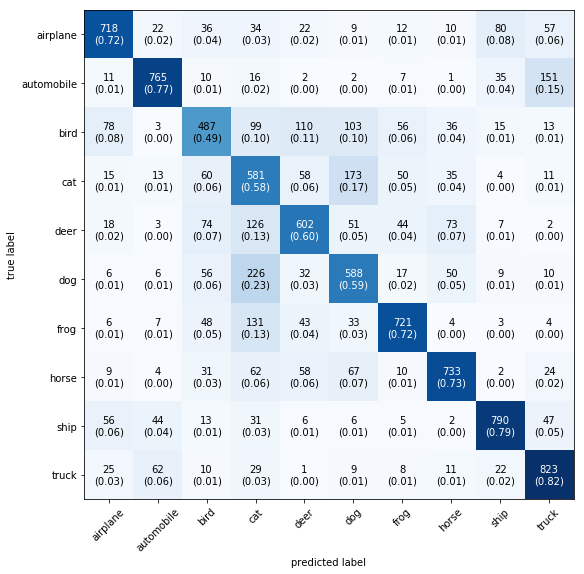

In [0]:
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)